C:\Users\manmi\AppData\Local\Temp\ipykernel_37476\621048280.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start = "2002-01-01", end = '2025-01-01')["Close"]
[*********************100%***********************]  11 of 11 completed


Ticker            BAC           C       CL=F    DX-Y.NYB         GC=F  \
Date                                                                    
2002-01-02  17.739313  274.352448  21.010000  115.790001   278.899994   
2002-01-03  17.719589  274.567566  20.370001  116.110001   278.200012   
2002-01-04  17.995708  279.677185  21.620001  116.330002   278.899994   
2002-01-07  17.781580  276.396118  21.480000  116.330002   278.600006   
2002-01-08  17.497004  266.230988  21.250000  116.830002   278.899994   
...               ...         ...        ...         ...          ...   
2024-12-24  43.843319   69.495300  70.099998  108.260002  2620.000000   
2024-12-26  44.011265   69.837875  69.620003  108.129997  2638.800049   
2024-12-27  43.803802   69.495300  70.599998  108.000000  2617.199951   
2024-12-30  43.379002   68.898224  70.989998  108.129997  2606.100098   
2024-12-31  43.418518   68.898224  71.720001  108.489998  2629.199951   

Ticker             JPM          MS         SPY    

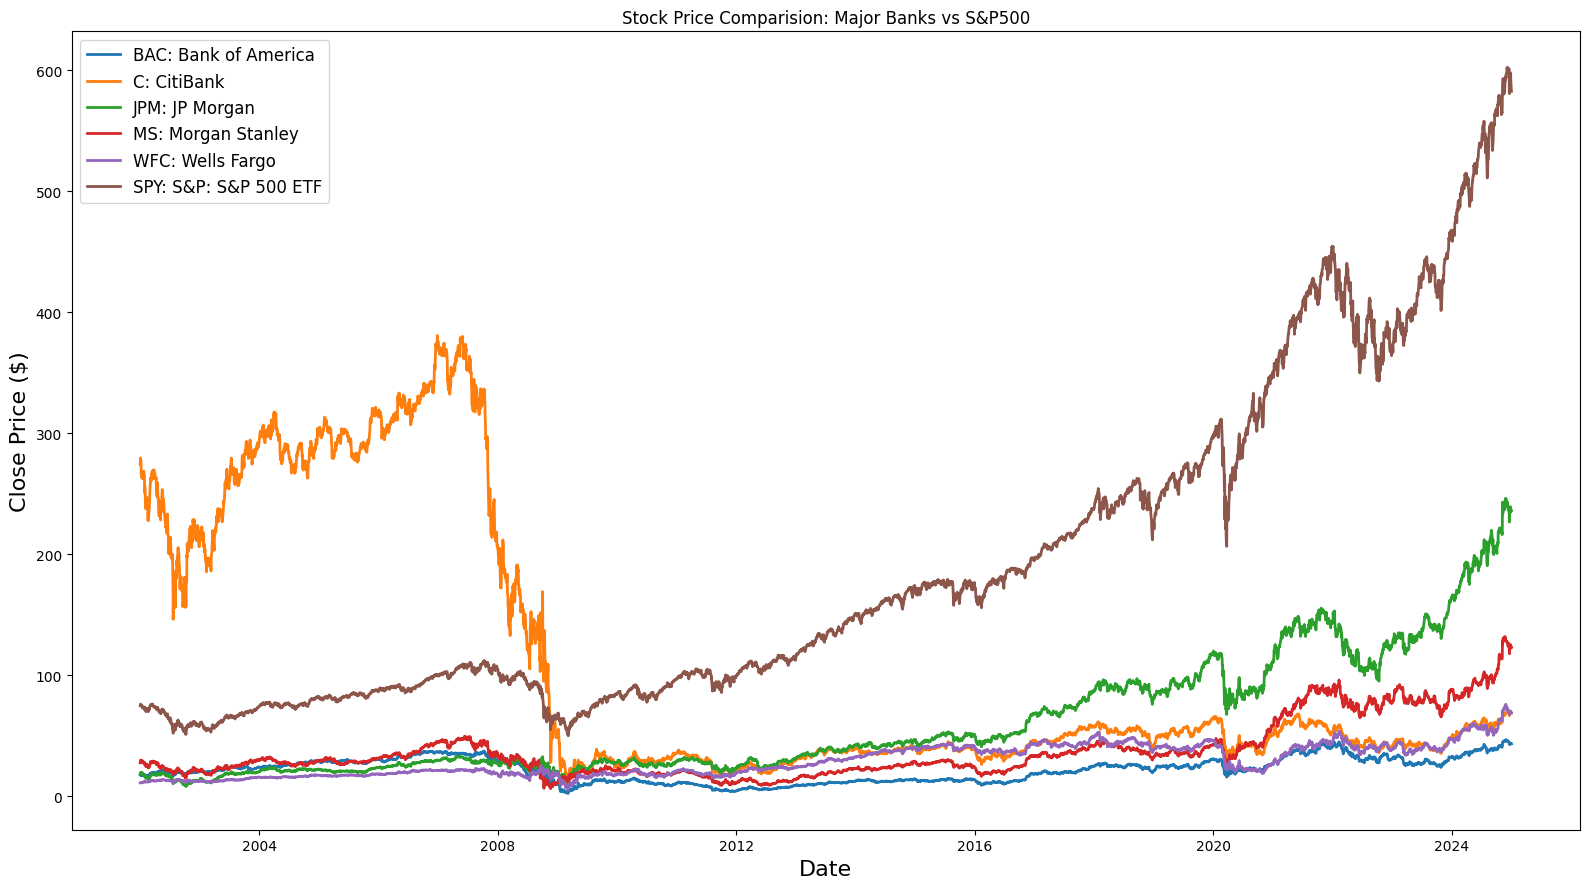

Empty DataFrame
Columns: []
Index: [2002-01-02 00:00:00, 2002-01-03 00:00:00, 2002-01-04 00:00:00, 2002-01-07 00:00:00, 2002-01-08 00:00:00]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5804 entries, 2002-01-10 to 2024-12-31
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BAC(t-1)                5804 non-null   float64
 1   JPM(t-1)                5804 non-null   float64
 2   MS(t-1)                 5804 non-null   float64
 3   C(t-1)                  5804 non-null   float64
 4   WFC(t-1)                5804 non-null   float64
 5   SPY(t-1)                5804 non-null   float64
 6   VIX(t-1)                5804 non-null   float64
 7   10Y_Yield(t-1)          5804 non-null   float64
 8   Gold_Futures(t-1)       5804 non-null   float64
 9   USDollar_Futures(t-1)   5804 non-null   float64
 10  Crude_Oil_Futures(t-1)  5804 non-null   float64
 11  BAC_MA5                 5804 non-null   

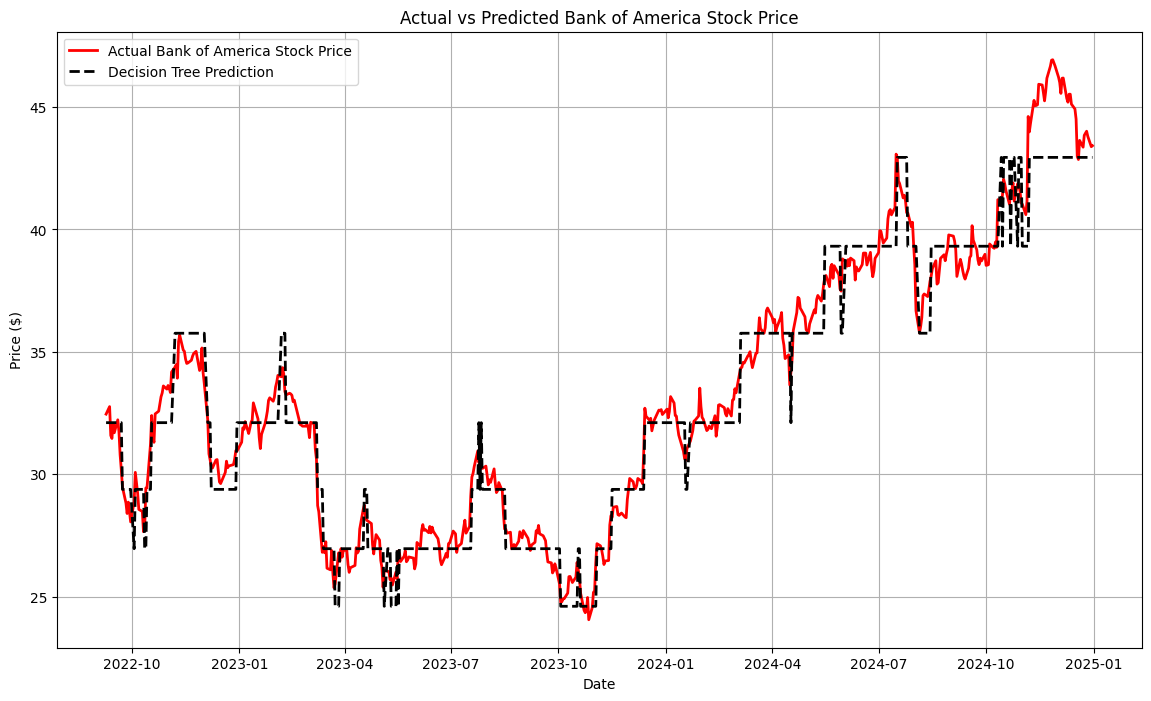

                   Feature  Importance
0                 BAC(t-1)         1.0
1                 JPM(t-1)         0.0
2                  MS(t-1)         0.0
3                   C(t-1)         0.0
4                 WFC(t-1)         0.0
5                 SPY(t-1)         0.0
6                 VIX(t-1)         0.0
7           10Y_Yield(t-1)         0.0
8        Gold_Futures(t-1)         0.0
9    USDollar_Futures(t-1)         0.0
10  Crude_Oil_Futures(t-1)         0.0
11                 BAC_MA5         0.0
12                BAC_MA10         0.0
13         BAC_Volatility5         0.0


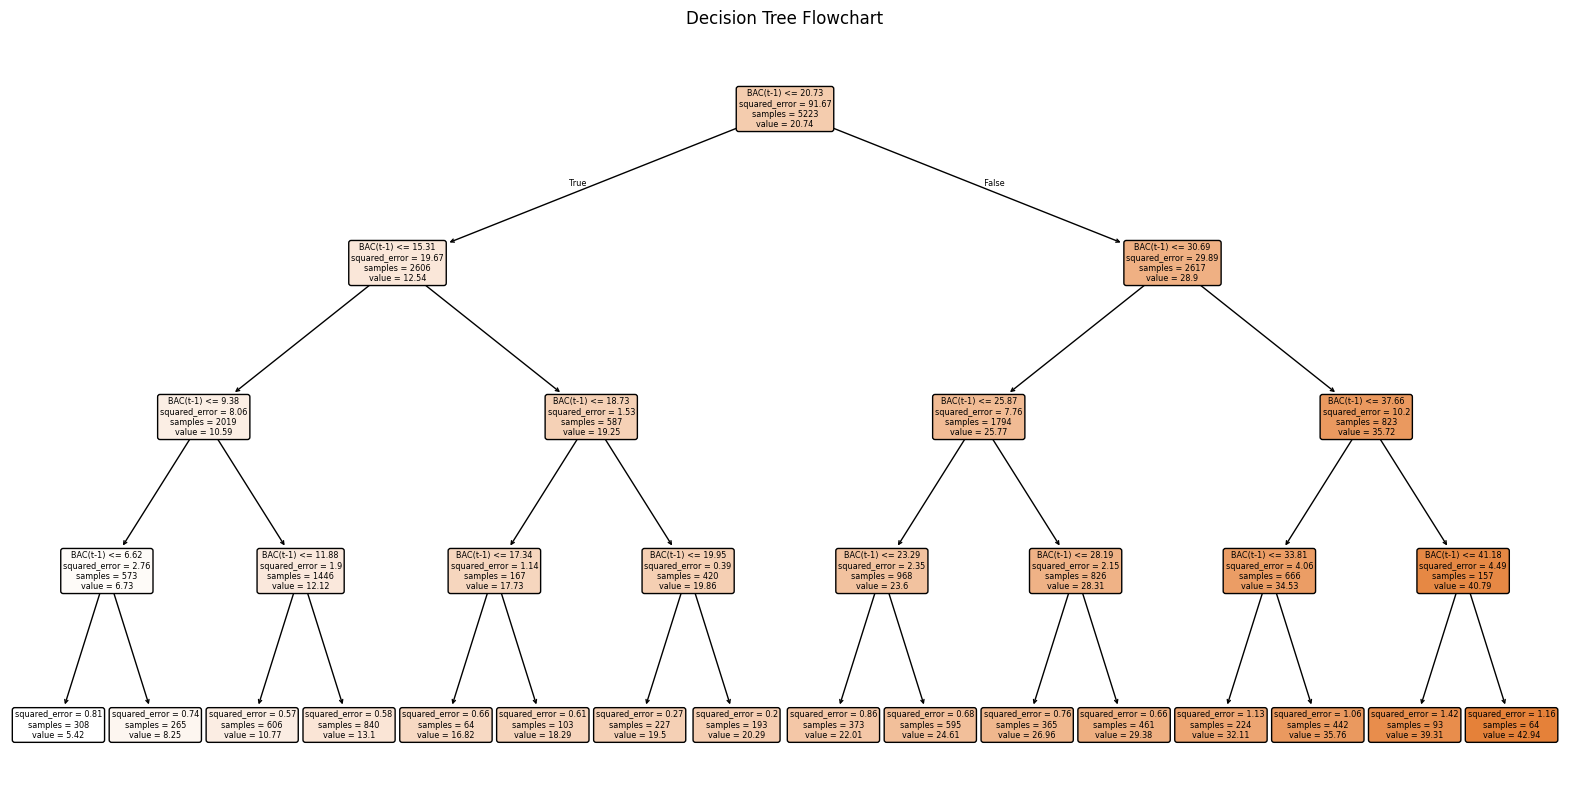

          Date     Actual  DT Prediction  RF Prediction  KNN Prediction  \
0   2022-09-09  32.454723      32.106090      31.986384       31.243476   
1   2022-09-12  32.761246      32.106090      31.925631       31.177170   
2   2022-09-13  31.581579      32.106090      32.387197       31.251209   
3   2022-09-14  31.460833      32.106090      31.642788       31.243476   
4   2022-09-15  32.055298      32.106090      31.638888       31.016784   
..         ...        ...            ...            ...             ...   
576 2024-12-24  43.843319      42.941826      43.116264       34.092493   
577 2024-12-26  44.011265      42.941826      43.276832       34.092493   
578 2024-12-27  43.803802      42.941826      43.848721       34.092493   
579 2024-12-30  43.379002      42.941826      43.203233       34.092493   
580 2024-12-31  43.418518      42.941826      43.293695       34.092493   

     SVR Prediction  
0         32.609752  
1         33.087109  
2         33.399514  
3         3

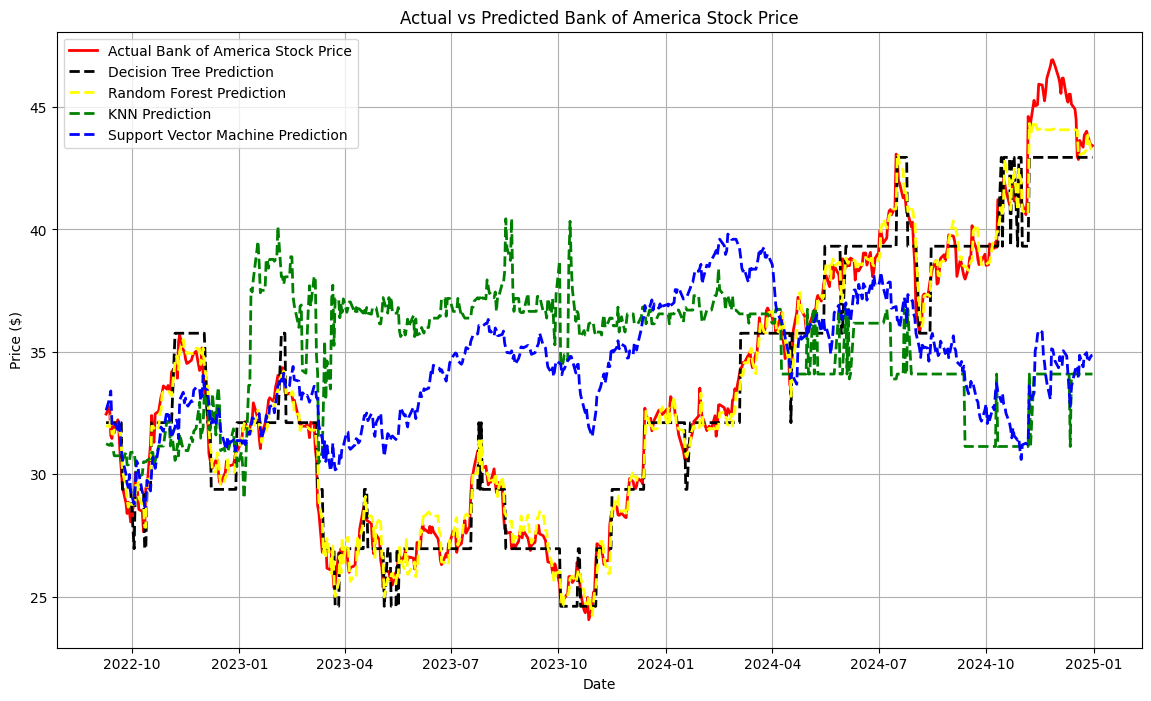

In [1]:
# Project 3: Predict BAC Stock Price Using Machine Learning and Macroeconomic Variable

# 1) Build ML models to predict BAC's next day price using historical stock data,
# peer financial stocks (JPM, MS, C, WFC), and key macroeconomic var (VIX, 10Y Treasury Yield, Dollar Index,
# Oil Prices, and Gold Price)

# 2) Perform feature engineering

# 3) Apply different ML algorithms such as Decision Tree, Random Forest, Support Vector Machine, and K-Nearest
# Neighbors (KNN) models

# 4) Evaluate the model based on R square, rmse, mse, mae and other metrics


# Import neccessary data science packages
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR



# 'BAC' => Bank of America Corp
# 'JPM' => JP Morgan Chase & Co. (peer finance stock)
# 'MS' => Morgan Stanley (peer finance stock)
# 'C' => Citi Group (peer finance stock)
# 'WFC' => Wells Fargo & Co (peer finance stock)
# 'SPY' => S&P500 ETF (Market Index)
# '^VIX' => CBOE Volatility Index (market fear indicator)
# '^TNX' => 10Y US Treasury Yield (Interest Rate Indicator)
# 'DX-Y.NYB' => US Dollar Index (strength of US Dollar)
# 'CL=F' => Crude Oil Future (Inflation/Energy proxy)
# 'GC=F' => Gold Future (Safe Asset)


tickers = ['BAC', 'JPM', "MS", "C", "WFC", "SPY", "^VIX", "^TNX", "DX-Y.NYB","CL=F","GC=F"]

data = yf.download(tickers, start = "2002-01-01", end = '2025-01-01')["Close"]

print(data)

print(data.info())

#Satistical Summary of Your Data

print(data.describe())

print(data.isnull().sum())

#What can we do with the missing data?

#1) Drope the values
#2) Forward Fill => Carries Forward the last known value
#3) Backwards Fill => Filling in the Value backwards
#4) Average of a particular Stock
#5) Interpolation => linear interpolation or Cubic Spline INterpolation or Monotone Convex Interpolation

#Eg: Forward fill

#df = [100, np.nan, np.nan, 200]
#df = df.fillna(method = 'ffill') or df.ffill()
#df = [100,100,100,200]

#Eg: Backwards Fill
#df = [100,np.nan, np.nan, 200]
#df = [100,200,200,200]

#Average

#df = [100, np.nan, np.nan, 200]
#df = [100,150,150,200]
#(200+100)/2= 150

#Applying forward fill on my dataset
data = data.ffill()
print(data.head())

#Check how mny missing values are present in the dataset

print(data.isnull().sum())



print(data.corr()) #correlation table

#Vsiualization of our stocks performance

#Create a larger figure
plt.figure(figsize = (16,9))


#Plot each stock
plt.plot(data.index, data["BAC"], label = 'BAC: Bank of America', linewidth = 2)
plt.plot(data.index, data["C"], label = 'C: CitiBank', linewidth = 2)
plt.plot(data.index, data["JPM"], label = 'JPM: JP Morgan', linewidth = 2)
plt.plot(data.index, data["MS"], label = 'MS: Morgan Stanley', linewidth = 2)
plt.plot(data.index, data["WFC"], label = 'WFC: Wells Fargo', linewidth = 2)
plt.plot(data.index, data["SPY"], label = 'SPY: S&P: S&P 500 ETF', linewidth = 2)

#Title, label for X & Y Axis

plt.title("Stock Price Comparision: Major Banks vs S&P500")
plt.xlabel("Date", fontsize = 16)
plt.ylabel("Close Price ($)", fontsize = 16)

#Add grid lines for readability

#Customize the legend

plt.legend(fontsize = 12, loc = 'upper left')

#Show the plot 

plt.tight_layout()
plt.show()


#Feature Engineering

df = pd.DataFrame(index = data.index)
print(df.head())

#Create lagging Indicators/features - Stock Data

df['BAC(t-1)'] = data["BAC"].shift(1)
df['JPM(t-1)'] = data["JPM"].shift(1)
df['MS(t-1)'] = data["MS"].shift(1)
df['C(t-1)'] = data["C"].shift(1)
df['WFC(t-1)'] = data["WFC"].shift(1)
df['SPY(t-1)'] = data["SPY"].shift(1)


#Create lag features - Macroeconomic Data

df['VIX(t-1)'] = data["^VIX"].shift(1)
df['10Y_Yield(t-1)'] = data["^TNX"].shift(1)
df['Gold_Futures(t-1)'] = data["GC=F"].shift(1)
df['USDollar_Futures(t-1)'] = data["DX-Y.NYB"].shift(1)
df['Crude_Oil_Futures(t-1)'] = data["CL=F"].shift(1)

#Technical Indicators = 5 & 10 Day Moving Average & 5 Day Rolling Volatility

df["BAC_MA5"] = data["BAC"].rolling(window = 5).mean().shift(1)
df["BAC_MA10"] = data["BAC"].rolling(window = 5).mean().shift(1)
df["BAC_Volatility5"] = data["BAC"].pct_change(5).shift(1)

#Include Target Variable
df["Target"] = data['BAC']

#Drop Nan Values

df = df.dropna()

df.info() 
df.isnull().sum()

#train our ML Algo

#a) Tell it the x and y variables
#b) Split data into training and testing (80,20)
#c) Apply ML Algo
#d) Do the prediction
#e) Evaluate the model based on R2, rmse, rse
#f) Visualization => Actual vs Forecasted


#a) Tell what is the X variable and Y variable is 

x = df.drop('Target', axis = 1)
y = df["Target"]

#b) Split our data into training and testing (90:10)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, shuffle = False, test_size = 0.10)



#c) Apply ML Algo: Decision tree
dt_model = DecisionTreeRegressor(max_depth = 4) #Calling the DT Model
dt_model.fit(X_train, Y_train) #Train my DT Model 

#d) Do prediction 

dt_pred = dt_model.predict(X_test)
print(dt_pred)

#Show Result
result = pd.DataFrame(Y_test.index)
result['Actual'] = Y_test.values
result['Predicted'] = dt_pred
print(result)



#tell the size of the plot
plt.figure(figsize= (14,8))

#Plot the actual value and predicted value
plt.plot(Y_test.index, Y_test, label = "Actual Bank of America Stock Price", linewidth = 2, color = "red")
plt.plot(Y_test.index, dt_pred, label = "Decision Tree Prediction", linewidth = 2, color = 'black', linestyle = "--")

#Highlight Title, xlabel & ylabel
plt.title("Actual vs Predicted Bank of America Stock Price")
plt.xlabel("Date")
plt.ylabel("Price ($)")

plt.grid()
plt.legend()
plt.show()


#What are more technical indicators you can create -> Add more variables, 200 is the typcial number for a hedge fund or trading firm

#What all features were most important

importance = dt_model.feature_importances_
features_name  = X_train.columns

df_features = pd.DataFrame({"Feature":features_name, "Importance":importance})
df_features = df_features.sort_values(by = "Importance", ascending= False)
print(df_features)

plt.figure(figsize = (20,10))
plot_tree(dt_model, feature_names= x.columns, filled = True, rounded = True, precision = 2)
plt.title("Decision Tree Flowchart")
plt.show()

#What is the depth behind the decison tree?, max_depth = # of wquestions you want it to ask


rf_model = RandomForestRegressor(n_estimators = 100)
rf_model.fit(X_train,Y_train )


knn_model = KNeighborsRegressor(n_neighbors = 5)
knn_model.fit(X_train,Y_train )

svr_model = SVR()
svr_model.fit(X_train,Y_train )

rf_pred = rf_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
svr_pred = svr_model.predict(X_test)

result = pd.DataFrame(Y_test.index)
result['Actual'] = Y_test.values
result['DT Prediction'] = dt_pred
result['RF Prediction'] = rf_pred
result['KNN Prediction'] = knn_pred
result['SVR Prediction'] = svr_pred
print(result)

#e) Evaluate the model based on R^2, rmse, mse

def evaluate_model(y_true,y_pred, model_name):
    r2 = r2_score(y_true,y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print("Model Name: ",model_name)
    print("R2 Value: ", r2)
    print("MSE: ", mse)
    print("RMSE: ",rmse)
    print("\n")


evaluate_model(Y_test,dt_pred, "Decision Tree")
evaluate_model(Y_test,rf_pred, "Random Forest")
evaluate_model(Y_test,knn_pred, "K Nearest Neighbour Model")
evaluate_model(Y_test,svr_pred, "Support Vector Machine Model")

#tell the size of the plot
plt.figure(figsize= (14,8))

#Plot the actual value and predicted value
plt.plot(Y_test.index, Y_test, label = "Actual Bank of America Stock Price", linewidth = 2, color = "red")
plt.plot(Y_test.index, dt_pred, label = "Decision Tree Prediction", linewidth = 2, color = 'black', linestyle = "--")
plt.plot(Y_test.index, rf_pred, label = "Random Forest Prediction", linewidth = 2, color = 'yellow', linestyle = "--")
plt.plot(Y_test.index, knn_pred, label = "KNN Prediction", linewidth = 2, color = 'green', linestyle = "--")
plt.plot(Y_test.index, svr_pred, label = "Support Vector Machine Prediction", linewidth = 2, color = 'blue', linestyle = "--")

#Highlight Title, xlabel & ylabel
plt.title("Actual vs Predicted Bank of America Stock Price")
plt.xlabel("Date")
plt.ylabel("Price ($)")

plt.grid()
plt.legend()
plt.show()